In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Lucas\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Import de dados

In [3]:
fires = pd.read_csv('./data/database_fires.csv')

In [4]:
fires.head()

,id,estado,estacao,data,precipitacao,temp_max,temp_min,insolacao,evaporacao_piche,temp_comp_med,umidade_rel_med,vel_vento_med,altitude,fires
0,1,AC,50484,01/01/2016,NaN,31.4,NaN,2.3,NaN,NaN,96.0,0.00000,170.0,0
1,2,AC,50484,02/01/2016,0.0,32.5,23.3,4.4,NaN,26.44,95.0,0.51444,170.0,0
2,3,AC,50484,03/01/2016,35.2,30.5,24.0,0.6,NaN,25.78,97.0,0.51444,170.0,0
3,4,AC,50484,04/01/2016,60.2,31.7,22.3,2.0,NaN,25.94,96.0,0.00000,170.0,0
4,5,AC,50484,05/01/2016,28.4,28.5,23.0,0.1,NaN,25.04,95.0,0.00000,170.0,0


In [38]:
respostas = pd.read_csv('./data/respostas.csv')

## Feature Engineering

### Fix Feature de temperaturas

In [24]:
# Dropar a temp_cond_media por ter alta correlacao com outras features

fires = fires.drop(columns = ['temp_comp_med'])
respostas = respostas.drop(columns = ['temp_comp_med'])

# Adicionar feature de delta_temp

fires['delta_temp'] = fires['temp_max'] - fires['temp_min']
respostas['delta_temp'] = respostas['temp_max'] - respostas['temp_min']

In [26]:
# Célula para ajustar ordem de colunas
fires = fires[['id', 'estado', 'estacao', 'data', 'precipitacao', 
               'temp_max','temp_min', 'insolacao', 'evaporacao_piche', 
               'umidade_rel_med', 'vel_vento_med', 'altitude', 'delta_temp', 'fires']]

respostas = respostas[['id', 'estado', 'estacao', 'data', 'precipitacao', 
               'temp_max','temp_min', 'insolacao', 'evaporacao_piche', 
               'umidade_rel_med', 'vel_vento_med', 'altitude', 'delta_temp']]

In [8]:
fires.head()

,id,estado,estacao,data,precipitacao,temp_max,temp_min,insolacao,evaporacao_piche,umidade_rel_med,vel_vento_med,altitude,delta_temp,fires
0,1,AC,50484,01/01/2016,NaN,31.4,NaN,2.3,NaN,96.0,0.00000,170.0,NaN,0
1,2,AC,50484,02/01/2016,0.0,32.5,23.3,4.4,NaN,95.0,0.51444,170.0,9.2,0
2,3,AC,50484,03/01/2016,35.2,30.5,24.0,0.6,NaN,97.0,0.51444,170.0,6.5,0
3,4,AC,50484,04/01/2016,60.2,31.7,22.3,2.0,NaN,96.0,0.00000,170.0,9.4,0
4,5,AC,50484,05/01/2016,28.4,28.5,23.0,0.1,NaN,95.0,0.00000,170.0,5.5,0


### Fix feature de datas

Transformei a coluna de data em outras duas:
 - dia_ano: é uma coluna type Timestamp (pra ser contínuo) com dia e mês da linha mas tudo no mesmo ano para pegar efeitos de sazonalidade
 - ano: ano da linha pq pode ser que um ano seja mais propício a ter incêndios que outro

In [27]:
fires['dia_ano'] = fires['data'].map(lambda x: pd.to_datetime(x[:-5] + '/2000', format = '%d/%m/%Y'))
respostas['dia_ano'] = respostas['data'].map(lambda x: pd.to_datetime(x[:-5] + '/2000', format = '%d/%m/%Y'))

fires['ano'] = fires['data'].map(lambda x: int(x[-4:]))
respostas['ano'] = respostas['data'].map(lambda x: int(x[-4:]))

fires = fires.drop(columns = ['data'])
respostas = respostas.drop(columns = ['data'])

In [28]:
# Célula para ajustar ordem de colunas
fires = fires[['id', 'estado', 'estacao', 'precipitacao', 
               'temp_max','temp_min', 'insolacao', 'evaporacao_piche', 
               'umidade_rel_med', 'vel_vento_med', 'altitude', 'delta_temp', 'dia_ano', 'ano', 'fires']]

respostas = respostas[['id', 'estado', 'estacao', 'precipitacao', 
               'temp_max','temp_min', 'insolacao', 'evaporacao_piche', 
               'umidade_rel_med', 'vel_vento_med', 'altitude', 'delta_temp', 'ano']]

In [11]:
fires.head()

,id,estado,estacao,precipitacao,temp_max,temp_min,insolacao,evaporacao_piche,umidade_rel_med,vel_vento_med,altitude,delta_temp,dia_ano,ano,fires
0,1,AC,50484,NaN,31.4,NaN,2.3,NaN,96.0,0.00000,170.0,NaN,2000-01-01,2016,0
1,2,AC,50484,0.0,32.5,23.3,4.4,NaN,95.0,0.51444,170.0,9.2,2000-01-02,2016,0
2,3,AC,50484,35.2,30.5,24.0,0.6,NaN,97.0,0.51444,170.0,6.5,2000-01-03,2016,0
3,4,AC,50484,60.2,31.7,22.3,2.0,NaN,96.0,0.00000,170.0,9.4,2000-01-04,2016,0
4,5,AC,50484,28.4,28.5,23.0,0.1,NaN,95.0,0.00000,170.0,5.5,2000-01-05,2016,0


### Create feature de estado

Encode básico (one-hot) para a coluna de estado. Criei a feature região, que indica a macro-região a qual o estado pertence.

In [29]:
# One-hot enconde com drop_first = True para remover dependencia de variáveis
respostas = pd.get_dummies(respostas,prefix=['estado'], drop_first=True)
fires = pd.get_dummies(fires,prefix=['estado'], drop_first=True)

In [23]:
# Feature região

#AINDA NÃO FIZ

### Fix (?) feature de estacao

Ainda não entendi muito bem essa feature, então dropei ela

In [30]:
fires = fires.drop(columns = ['estacao'])
respostas = respostas.drop(columns = ['estacao'])

## Modelagem

### Modelo de ensemble de árvores usando XGBoost API

In [14]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [15]:
# Dataframe não contendo as variáveis categóricas ainda não tratadas (id, estacao, dia_ano). Dia_ano estou tendo problemas, teoricamente é numérica.
dados_modelo = fires.drop(columns = ['id', 'dia_ano'])

In [50]:
y = pd.DataFrame(dados_modelo['fires'])
x = dados_modelo.drop(columns = ['fires'])

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.15)

In [58]:
param = {'eta': 0.2, 
         'max_depth': 4, 'objective': 'binary:logistic'}
param['eval_metric'] = 'auc'

steps = 30

#Transformando o df em DMatrix por causa do XGBoost
train = xgb.DMatrix(X_train, label=Y_train)

model = xgb.train(param, train, steps)

In [53]:
# Saving the current model
model.save_model('./models/xgboost_0003.model')

#### Evaluating the current model

In [44]:
bst = xgb.Booster({'nthread': 4})  # init model
bst.load_model('./models/xgboost_model.bin') 

array([0.12250785, 0.28831634, 0.11807205, ..., 0.28067452, 0.39013144,
       0.19767644], dtype=float32)

In [54]:
D_test = xgb.DMatrix(X_test, label=Y_test)

preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

print("Precision = {}".format(precision_score(Y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(Y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(Y_test, best_preds)))
print("AUC ROC = {}".format(roc_auc_score(Y_test, preds)))

Precision = 0.37119366626065775
Recall = 0.5
Accuracy = 0.7423873325213155
AUC ROC = 0.8154517179813044


C:\Users\Lucas\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Evaluating feature importance

<Figure size 1800x1800 with 0 Axes>

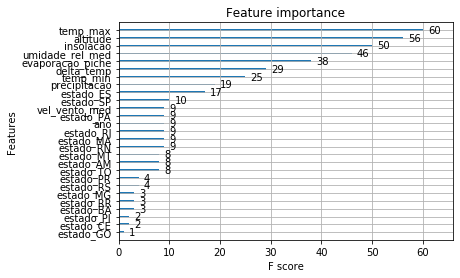

In [55]:
plt.figure(figsize=(25,25))
xgb.plot_importance(model)

### Modelo XGBoost using Scikit-learn

In [16]:
from xgboost import XGBClassifier

In [17]:
y = (dados_modelo['fires'])
x = dados_modelo.drop(columns = ['fires'])

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.30)

In [19]:
model = XGBClassifier()

eval_set = [(X_train, Y_train), (X_test, Y_test)]
eval_metric = ["auc","error"]

%time model.fit(X_train, Y_train, early_stopping_rounds = 40, eval_metric=eval_metric, eval_set=eval_set, verbose=False)

Wall time: 51.7 s


XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [20]:
y_pred = model.predict(X_test)
round_predictions = [round(value) for value in y_pred]

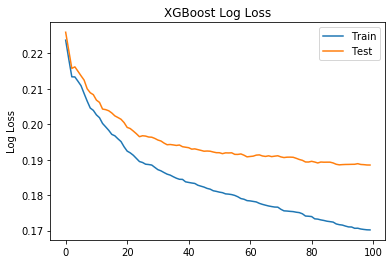

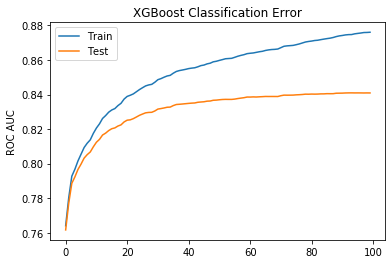

In [84]:
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()
# plot auc curve
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['auc'], label='Train')
ax.plot(x_axis, results['validation_1']['auc'], label='Test')
ax.legend()
plt.ylabel('ROC AUC')
plt.title('XGBoost Classification Error')
plt.show()

In [32]:
print("Precision = {}".format(precision_score(Y_test, round_predictions, average='macro')))
print("Recall = {}".format(recall_score(Y_test, round_predictions, average='macro')))
print("Accuracy = {}".format(accuracy_score(Y_test, round_predictions)))
print("AUC ROC = {}".format(roc_auc_score(Y_test, round_predictions)))

Precision = 0.7638290533003622
Recall = 0.6981917309363437
Accuracy = 0.8136261932186785
AUC ROC = 0.6981917309363436


In [31]:
respostas.head()

,id,precipitacao,temp_max,temp_min,insolacao,evaporacao_piche,umidade_rel_med,vel_vento_med,altitude,delta_temp,...,estado_PI,estado_PR,estado_RJ,estado_RN,estado_RR,estado_RS,estado_SC,estado_SE,estado_SP,estado_TO
0,251768,5.8,34.7,23.7,8.8,NaN,92.00,1.028880,170.0,11.0,...,0,0,0,0,0,0,0,0,0,0
1,251769,0.0,30.0,23.7,0.2,NaN,93.00,0.000000,170.0,6.3,...,0,0,0,0,0,0,0,0,0,0
2,251770,0.0,35.5,24.1,7.1,NaN,97.00,0.000000,170.0,11.4,...,0,0,0,0,0,0,0,0,0,0
3,251771,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,170.0,NaN,...,0,0,0,0,0,0,0,0,0,0
4,251772,0.0,34.7,21.6,8.3,2.0,86.75,0.666667,160.0,13.1,...,0,0,0,0,0,0,0,0,0,0


In [34]:
respostas = respostas.drop(columns = ['id'])

In [35]:
submission = model.predict(respostas)

In [39]:
ids = respostas['id']

In [51]:
submission.shape

(44342, 1)

In [46]:
submission = pd.DataFrame(submission)
submission.columns = ['fires']

In [49]:
(pd.merge(ids, submission, left_index = True, right_index = True)).to_csv('./submissions/sub_01.csv', index = False)